<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Основы-PyTorch" data-toc-modified-id="Основы-PyTorch-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Основы PyTorch</a></span><ul class="toc-item"><li><span><a href="#Задача-№1" data-toc-modified-id="Задача-№1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Задача №1</a></span></li></ul></li><li><span><a href="#Задача-№2.-Функции-активации" data-toc-modified-id="Задача-№2.-Функции-активации-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задача №2. Функции активации</a></span></li></ul></div>

# Основы PyTorch

## Задача №1

- Объявите вещественные тензор `x` размера (3, 4, 5) и тензор `y` размера (2, 6, 3), иницилизируйте их равномерным распределением. 
- Создайте их копии на GPU, выведите их сумму и разность
- Затем измените форму тензора `y`, чтобы она совпадала с формой тензора `x`, получите тензор `z`  
- Переместите `z` на CPU

In [ ]:
import torch
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
x = torch.FloatTensor(3,4,5).uniform_()
y = torch.FloatTensor(2,6,5).uniform_()

In [ ]:
x_cuda = x.cuda()
y_cuda = y.view(3,4,5).cuda()

In [ ]:
print("Сумма = ", x_cuda.add(y_cuda))
print("Разность = ",x_cuda.sub(y_cuda))

Сумма =  tensor([[[0.5190, 1.3612, 1.1289, 0.7445, 1.5266],
         [1.3630, 1.4269, 1.8314, 1.3194, 0.7729],
         [0.4707, 0.6600, 1.3293, 1.1719, 0.8969],
         [0.8721, 0.4556, 0.5598, 1.3520, 1.1195]],

        [[0.7767, 1.3150, 1.0225, 1.2064, 0.7584],
         [1.2277, 0.8488, 1.0632, 1.3437, 1.4241],
         [0.7724, 1.3768, 1.5294, 0.6053, 1.5650],
         [0.4904, 0.9779, 0.6183, 0.8485, 0.4397]],

        [[0.6987, 1.6651, 0.2784, 0.9325, 1.1566],
         [1.3363, 1.7289, 1.5913, 1.3003, 1.0340],
         [1.3103, 0.5752, 1.4920, 0.9558, 1.2481],
         [1.4217, 1.5150, 0.2605, 1.0139, 0.7618]]], device='cuda:0')
Разность =  tensor([[[ 0.3639,  0.4191, -0.2011, -0.2329, -0.4074],
         [-0.4576,  0.5615, -0.1248, -0.5113, -0.0604],
         [ 0.1516, -0.2820, -0.3208, -0.1965,  0.0381],
         [-0.8099, -0.1137,  0.4688,  0.5729,  0.4297]],

        [[-0.7402, -0.1435,  0.1597,  0.6421, -0.6484],
         [-0.6331, -0.3586, -0.2672, -0.1685,  0.3489],
      

In [ ]:
z = y.view(3,4,5)

In [ ]:
z = z.cpu()

# Задача №2. Функции активации

Мы поняли, что пороговая функция активации сулит нам много проблем. Что если попробовать что-то другое?

Начнем с сигмоиды.

У сигмоиды все в порядке с производной. Можем взять производную функции потерь по весам и спускаться в пространстве параметров в направлении наискорейшего убывания функции потерь. Формула для обновления весов в градиентном спуске:

$$w^{j+1} = w^{j} - \alpha \frac{\partial Loss}{\partial w} (w^{j})$$

Распишем дальше:

* Для веса $w_j$:

$$ \frac{\partial Loss}{\partial w_j} = 
\frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)(\sigma(w \cdot x_i))_{w_j}' = \frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{ij}$$

* Градиент функции потерь по вектору весов - это вектор, $j$-ая компонента которого равна $\frac{\partial Loss}{\partial w_j}$:

$$\begin{align}
    \frac{\partial Loss}{\partial w} &= \begin{bmatrix}
           \frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{i1} \\
           \frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{i2} \\
           \vdots \\
           \frac{2}{n} \sum_{i=1}^n \left(\sigma(w \cdot x_i) - y_i\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{im}
         \end{bmatrix}
\end{align}=\frac{1}{n} X^T (\sigma(w \cdot X) - y)\sigma(w \cdot X)(1 - \sigma(w \cdot X))$$

Таким образом, сигмоида отлично подходит. Осталось реализовать в коде. 

* Реализуйте сигмоиду и её производную:

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def sigmoid_derivative(x): 
 
    s = sigmoid(x)
    return s * (1-s)

In [ ]:
def mse_loss(y_pred, y): # функция потерь
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    return 0.5 * np.mean((y_pred - y) ** 2)

In [ ]:
class Perceptron_Sigmoid:
    def __init__(self, w=None, b=0):

        self.w = w 
        self.b = b
  
    def activate(self, x):
     
      return sigmoid(x) 
        
    def forward(self, X): # прямой проход
    
        y_pred = np.dot(X, self.w) + self.b   
        y_pred = self.activate(y_pred)        
        return y_pred.reshape(-1,1)           
    
    def backward(self, X, y, y_pred, learning_rate=0.005): 

        n = X.shape[0]
        y = np.array(y).reshape(-1,1)
        normal = 1/n
        
        y_diff = y_pred - y                       

        y_d_sig = sigmoid_derivative(y_pred)      
        wgrad = X.T @ (y_diff * y_d_sig)                   
    

        dw =  normal * wgrad                
        db = (y_diff * y_d_sig).mean(axis=0)       

        self.w -= learning_rate*dw
        self.b -= learning_rate*db
    
    def fit(self, X, y, num_epochs=5000):

        self.w = np.zeros((X.shape[1], 1))  # вектор весов
        self.b = 0  # смещение
        loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.forward(X)
            loss_values.append(mse_loss(y_pred,y))
            self.backward(X,y,y_pred)
        
        return np.array(loss_values)

In [ ]:
def random_mix(X_1, X_2): # перемешиваем
    c = np.concatenate((X_1, X_2))
    np.random.shuffle(c)
    return c

In [ ]:
rng = np.random.default_rng()
data_0 = np.concatenate([rng.normal((-1, -1), 1, (500, 2)), np.zeros((500, 1))], axis=1) # сэмплируем нули
data_1 = np.concatenate([rng.normal((1, 1), 1, (500, 2)), np.ones((500, 1))], axis=1) # сэмплируем единицы
data = random_mix(data_0, data_1) # получаем наш набор данных

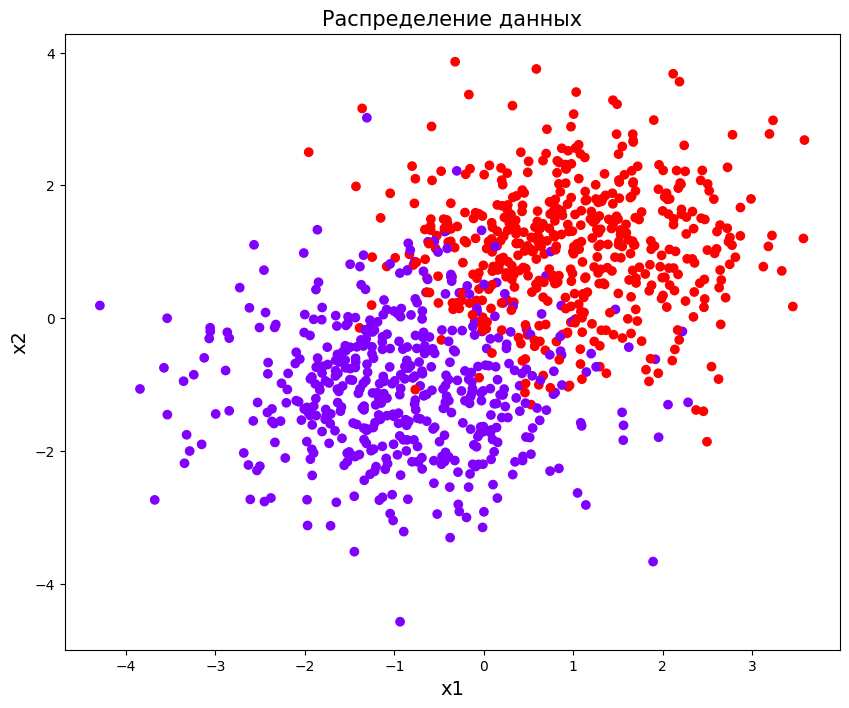

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='rainbow')
plt.title('Распределение данных', fontsize=15)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)
plt.show()

In [ ]:
X = data[:, :-1] # обучающая выборка
y = data[:, -1] # целевая переменная

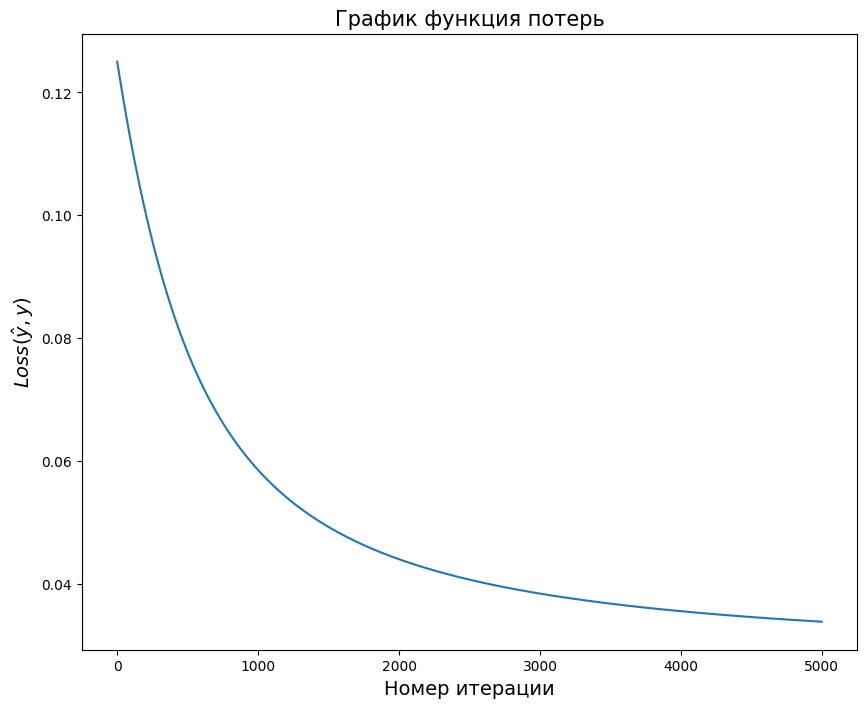

In [ ]:
perceptron = Perceptron_Sigmoid()
losses = perceptron.fit(X,y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('График функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Вуаля! Наконец, мы видим, что наш перцептрон обучается.

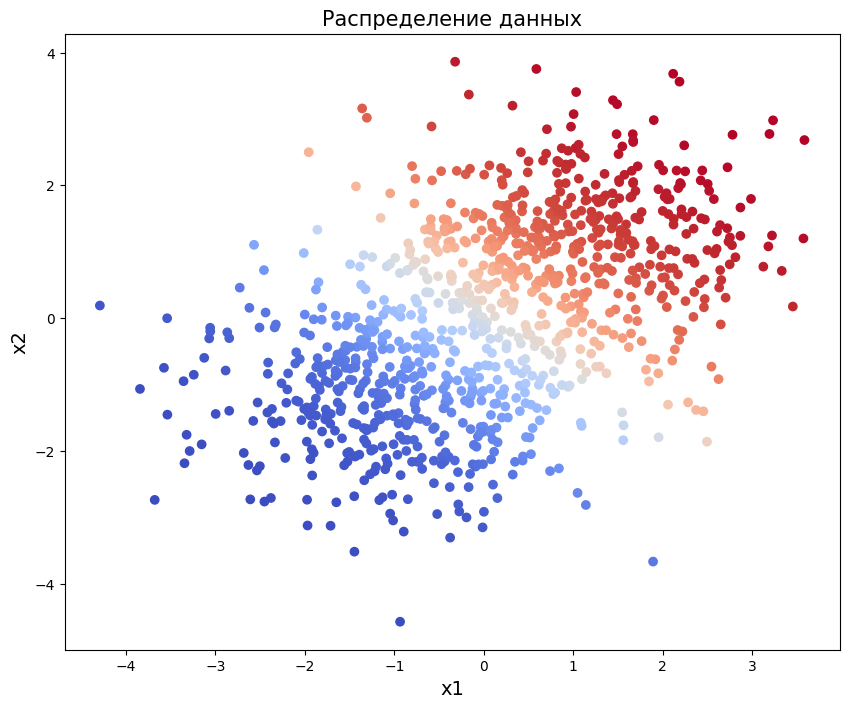

In [ ]:
def plot_perc(perceptron, cmap = 'rainbow'):
  plt.figure(figsize=(10, 8))
  plt.scatter(data[:, 0], data[:, 1], c=perceptron.forward(X).ravel(), cmap=cmap)
  plt.title('Распределение данных', fontsize=15)
  plt.xlabel('x1', fontsize=14)
  plt.ylabel('x2', fontsize=14)
  plt.show()

plot_perc(perceptron, 'coolwarm')

Однако данные все равно разделяет линейно. 

In [ ]:
print(accuracy_score(perceptron.forward(X).ravel()>0.5, y)) # рассчитаем значение accuracy

0.913


Может быть нам поможет ReLU()? Ведь про сигмоиду мы знаем, что у нее затухают градиенты. 

ReLU выглядит очень просто:

\begin{equation*}
ReLU(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Или по-другому:

$$
ReLU(x) = \max(0, x)
$$

В переводе Rectified Linear Unit = "Усечённая линейная функция". Мы по сути просто не даём проходить отрицательным числам.

Производная здесь берётся как производная от кусочно-заданной функции, то есть на участках, где функция гладкая, и в нуле её доопредляют нулём:

\begin{equation*}
ReLU'(x) = 
 \begin{cases}
   0, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Подставим ReLu в Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ReLU(w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n}
 \begin{cases}
    y_i^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

Тогда формула для обновления весов при градиентном спуске будет такая:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n}
 \begin{cases}
   0, &{w \cdot X_i \le 0}\\
   \frac{1}{n} X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

Почему в первом случае будет 0? Потому что в $y_i^2$ не входят веса , а мы берём производную именно по весам $w$.

* Реализуйте ReLU и её производную:

In [ ]:
def relu(x):
    return np.maximum(0,x)

In [ ]:
def relu_derivative(x):
    return (x > 0).astype(int)

In [ ]:
class Perceptron_ReLU:
    def __init__(self, w=None, b=0, zeros = True):

        self.zeros = zeros
        self.w = w
        self.b = b
        
    def activate(self, x):
        return relu(x)
        
    def forward(self, X):

        y_pred = np.dot(X, self.w) + self.b 
        y_pred = self.activate(y_pred)
        return y_pred.reshape(-1,1)
    
    def backward(self, X, y, y_pred, learning_rate=0.005):

        n = len(y)
        y = np.array(y).reshape(-1, 1)
        y_diff = y_pred - y

        y_d_relu = relu_derivative(y_pred)


        wgrad =  X.T @ (y_diff * y_d_relu)
  
        dw = wgrad / n       
        db = (y_diff * y_d_relu).mean(axis=0)    
        

        self.w -= learning_rate*dw 
        self.b -= learning_rate*db
    
    def fill_w_zeros(self,X):
      self.w = np.zeros((X.shape[1], 1))

    def fit(self, X, y, num_epochs=5000):

        if self.zeros:
         self.fill_w_zeros(X)
        self.b = 0  # смещение (число)
        loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.forward(X)
            loss_values.append(mse_loss(y_pred,y))
            self.backward(X,y,y_pred)
        
        return np.array(loss_values)

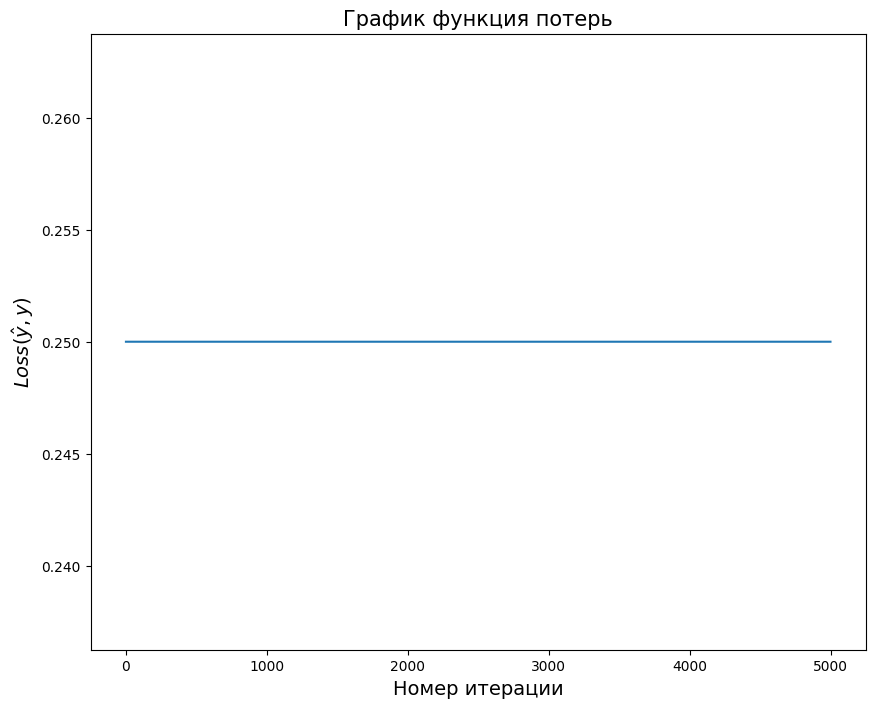

In [ ]:
perceptron_r = Perceptron_ReLU()
losses = perceptron_r.fit(X,y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('График функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Что мы видим? Что произошло с функцией потерь? 

Ничего удивительного, поскольку одна из проблем ReLU() это так называемые "мертвые" нейроны. А наши веса ведь изначально инициализированы нулями! Поэтому обучение и не происходит.

Заинициализируем их случайными числами (не забудьте закомментировать в классе инициализацию нулями):

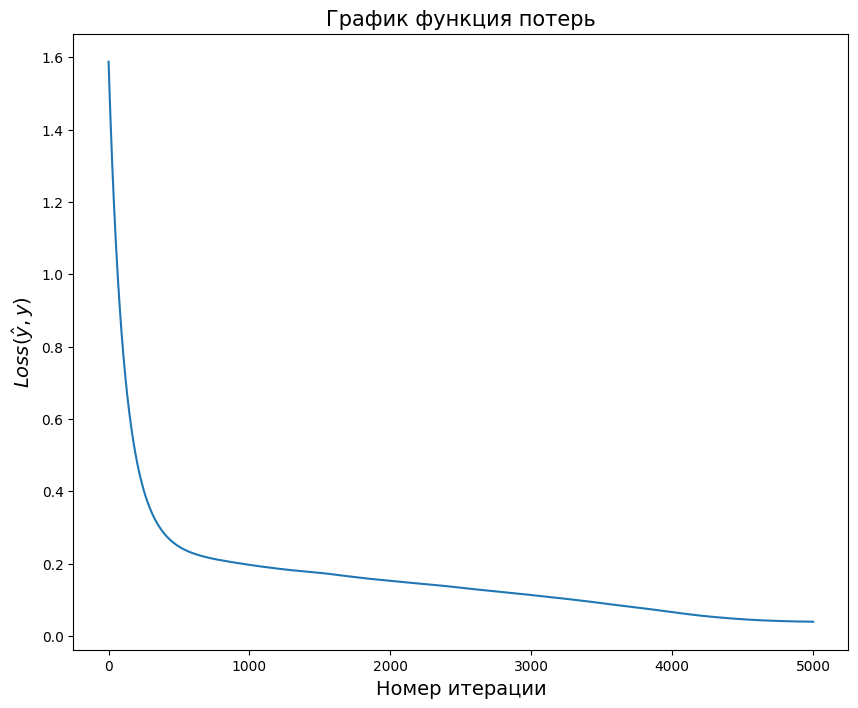

In [ ]:
rng = np.random.default_rng()
perceptron_r = Perceptron_ReLU(w = rng.normal(size = (X.shape[1], 1)), zeros=False)     
losses = perceptron_r.fit(X, y, num_epochs=5000)

plt.figure(figsize=(10, 8))
plt.plot(losses.reshape(-1,))
plt.title('График функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

sigmoid


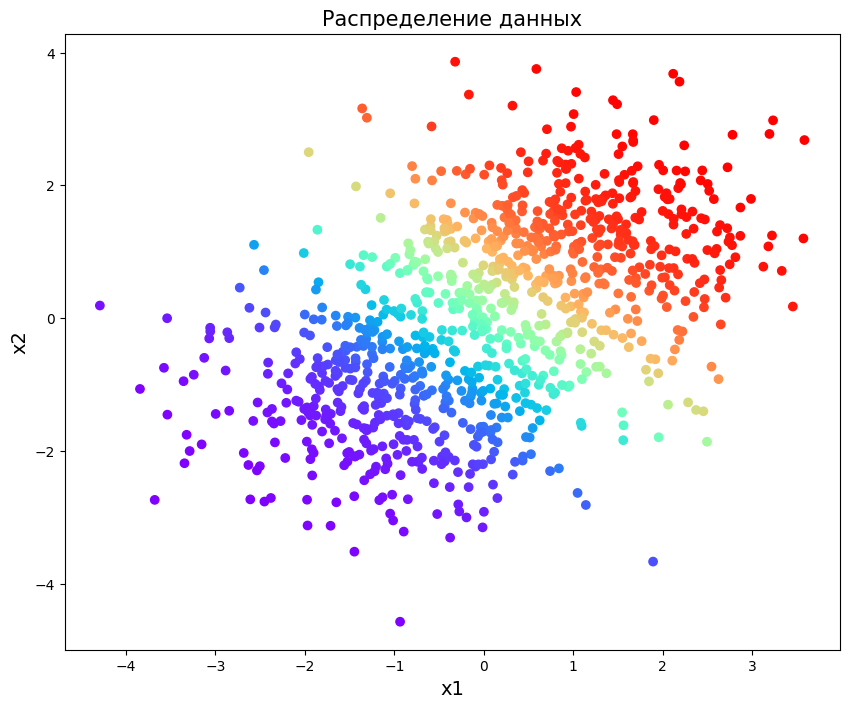

relu


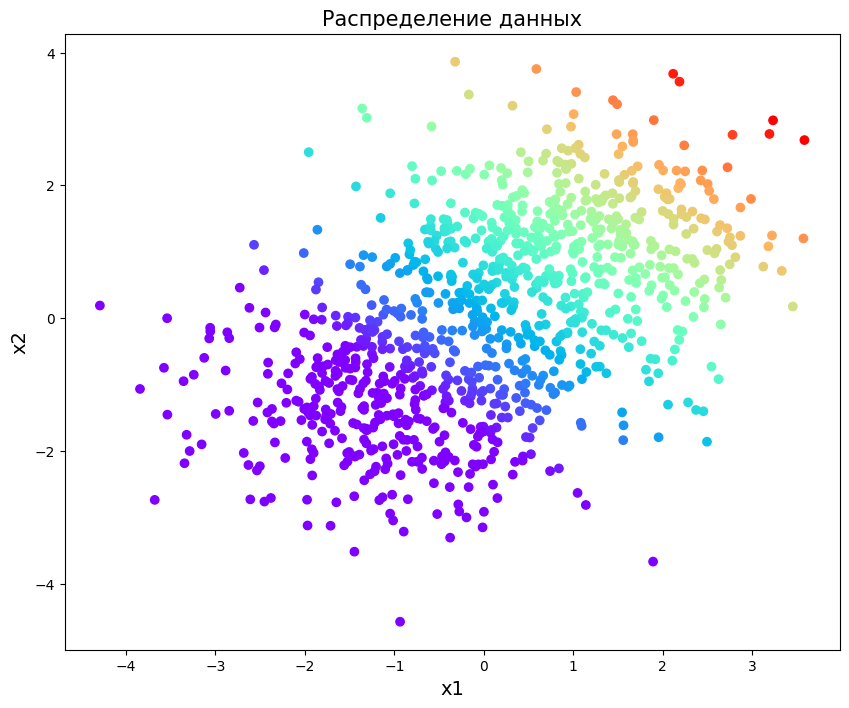

In [ ]:
print('sigmoid')
plot_perc(perceptron)
print('relu')
plot_perc(perceptron_r)

Ну вот, другое дело. Однако все равно мы видим линейный решатель. 

In [ ]:
print(accuracy_score(np.array(perceptron_r.forward(X) > 0.5).ravel(), y)) # рассчитаем значение accuracy

0.907


Что ж, можно сделать однозначный вывод: все свои возможности перцептрон исчерпал. Пора переходить к полносвязанным нейронным сетям. 